In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Ship_Scaled.csv')

# Display the first few rows of the dataset
print(df.head())

   Ship_Type  Route_Type  Engine_Type  Maintenance_Status  \
0   0.333333    0.333333          0.5                 0.0   
1   0.666667    0.666667          1.0                 1.0   
2   0.333333    0.333333          0.0                 0.5   
3   0.000000    1.000000          1.0                 0.5   
4   0.666667    1.000000          0.0                 0.5   

   Speed_Over_Ground_knots  Engine_Power_kW  Distance_Traveled_nm  \
0                 0.172666         0.625357              0.503367   
1                 0.025210         0.518488              0.518533   
2                 0.716607         0.459434              0.312357   
3                 0.736981         0.165847              0.552589   
4                 0.249079         0.235695              0.716076   

   Draft_meters  Weather_Condition  Cargo_Weight_tons  Operational_Cost_USD  \
0      0.913856                0.5           0.979420              0.967522   
1      0.965983                1.0           0.057553       

Objective 1: Predict Operational Costs
Goal : Build a predictive model to estimate the Operational_Cost_USD for each voyage based on features such as ship

Use Case : This objective is useful for budgeting, cost optimization, and financial planning.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('Ship.csv')

# Handle missing values 
df = df.dropna()

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


if 'Date' in df.columns:
    X = df.drop(columns=['Operational_Cost_USD', 'Date'])
else:
    X = df.drop(columns=['Operational_Cost_USD'])

y = df['Operational_Cost_USD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 19248270311.962387


Objective 2: Predict Revenue per Voyage

Goal : Develop a model to predict the Revenue_per_Voyage_USD based on operational and environmental factors.

Use Case : This objective helps in understanding revenue drivers and optimizing pricing strategies.

In [7]:
from sklearn.linear_model import LinearRegression

# Define features and target
if 'Date' in df.columns:
    X = df.drop(columns=['Revenue_per_Voyage_USD', 'Date'])
else:
    X = df.drop(columns=['Revenue_per_Voyage_USD'])
y = df['Revenue_per_Voyage_USD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 74110432426.38554


Objective 3: Predict Turnaround Time
Goal : Predict the Turnaround_Time_hours (time taken for loading, unloading, and preparation for the next voyage) based on ship characteristics, route details, and operational metrics.

Use Case : Reducing turnaround time can improve efficiency and increase the number of voyages per week.

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Define features and target
if 'Date' in df.columns:
    X = df.drop(columns=['Turnaround_Time_hours', 'Date'])
else:
    X = df.drop(columns=['Turnaround_Time_hours'])
y = df['Turnaround_Time_hours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 635.2778401402671


Objective 4: Predict Efficiency
Goal : Estimate the Efficiency_nm_per_kWh (nautical miles traveled per kilowatt-hour of energy consumed) to analyze fuel efficiency.

Use Case : Improving efficiency reduces fuel consumption and operational costs, contributing to sustainability goals.

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Define features and target
if 'Date' in df.columns:
    X = df.drop(columns=['Efficiency_nm_per_kWh', 'Date'])
else:
    X = df.drop(columns=['Efficiency_nm_per_kWh'])

y = df['Efficiency_nm_per_kWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.17545921343676005


Objective 5: Analyze Seasonal Impact
Goal : Investigate how the Seasonal_Impact_Score affects key metrics like operational costs, revenue, efficiency, or turnaround time.

Use Case : Understanding seasonal trends can help optimize operations during peak and off-peak seasons.


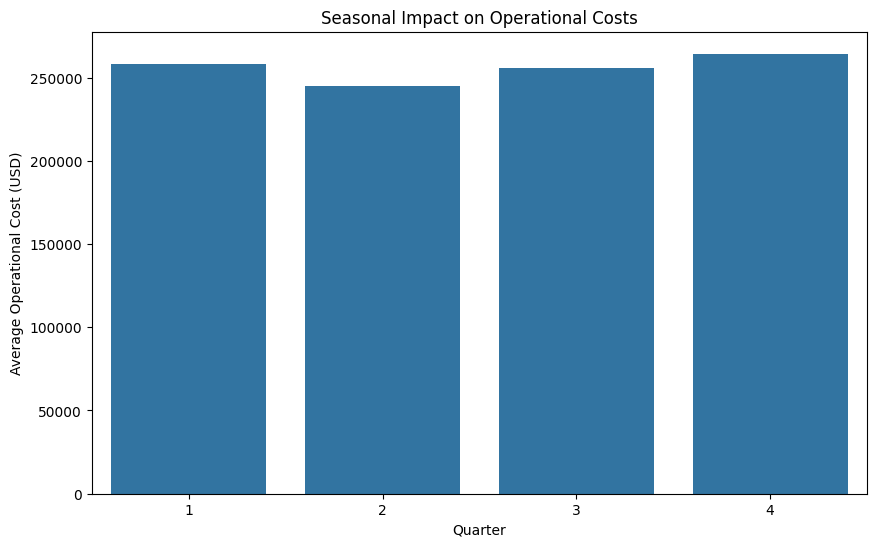

In [17]:
time_series_data = pd.read_csv('Ship_TimeSeries.csv')
import seaborn as sns
import matplotlib.pyplot as plt

# Group by quarter and calculate average operational cost
seasonal_impact = time_series_data.groupby('Quarter')['Operational_Cost_USD'].mean()

# Visualize seasonal impact
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_impact.index, y=seasonal_impact.values)
plt.title('Seasonal Impact on Operational Costs')
plt.xlabel('Quarter')
plt.ylabel('Average Operational Cost (USD)')
plt.show()

# Feature Selection Methods

1. Filter Method
Filter methods select features based on statistical measures, such as correlation, mutual information, chi-square, etc.

A. Correlation Analysis
We can calculate the correlation between numerical features and the target variable (Operational_Cost_USD) and select the most correlated features.

In [19]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix['Operational_Cost_USD'].sort_values(ascending=False)

print(correlation_with_target)

Operational_Cost_USD       1.000000
Date_2023-10-15            0.067403
Maintenance_Status_Good    0.037512
Date_2023-08-20            0.036153
Date_2024-03-24            0.034046
                             ...   
Date_2023-06-25           -0.035725
Speed_Over_Ground_knots   -0.037313
Cargo_Weight_tons         -0.037521
Date_2023-12-03           -0.037957
Date_2023-09-03           -0.053748
Name: Operational_Cost_USD, Length: 80, dtype: float64


B. Mutual Information
Mutual information measures the dependency between variables. It can capture any kind of relationship (linear or non-linear).

In [21]:
from sklearn.feature_selection import mutual_info_regression

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Operational_Cost_USD'])

# Compute mutual information
mutual_info = mutual_info_regression(numerical_features, df['Operational_Cost_USD'])
mutual_info = pd.Series(mutual_info, index=numerical_features.columns).sort_values(ascending=False)

print(mutual_info)

Cargo_Weight_tons          0.028697
Speed_Over_Ground_knots    0.015305
Efficiency_nm_per_kWh      0.008591
Revenue_per_Voyage_USD     0.005220
Distance_Traveled_nm       0.000612
Engine_Power_kW            0.000000
Draft_meters               0.000000
Turnaround_Time_hours      0.000000
Seasonal_Impact_Score      0.000000
Weekly_Voyage_Count        0.000000
Average_Load_Percentage    0.000000
dtype: float64


2. Embedded Method
Embedded methods perform feature selection as part of the model training process. Examples include Lasso regression, Ridge regression, and tree-based models like Random Forests.

 A.Lasso Regression
Lasso regression can shrink the coefficients of less important features to zero, effectively performing feature selection.

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
# Standardize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(numerical_features)

# Fit Lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, df['Operational_Cost_USD'])

# Get feature importance
lasso_coefficients = pd.Series(lasso.coef_, index=numerical_features.columns).sort_values(ascending=False)

print(lasso_coefficients)

Revenue_per_Voyage_USD     15265.256417
Distance_Traveled_nm        7748.861149
Seasonal_Impact_Score       6998.665820
Efficiency_nm_per_kWh       5171.795766
Weekly_Voyage_Count         -165.408392
Turnaround_Time_hours      -1277.301106
Draft_meters               -2818.044520
Engine_Power_kW            -6483.319140
Average_Load_Percentage   -10217.507168
Speed_Over_Ground_knots   -18435.449942
Cargo_Weight_tons         -18552.543013
dtype: float64


B. Random Forest Feature Importance
Random Forests provide feature importance scores based on how much each feature contributes to reducing impurity.

In [96]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(numerical_features, df['Operational_Cost_USD'])

# Get feature importance
rf_importance = pd.Series(rf.feature_importances_, index=numerical_features.columns).sort_values(ascending=False)

print(rf_importance)

Turnaround_Time_hours      0.097165
Speed_Over_Ground_knots    0.094545
Seasonal_Impact_Score      0.093308
Revenue_per_Voyage_USD     0.091430
Efficiency_nm_per_kWh      0.091134
Draft_meters               0.090325
Cargo_Weight_tons          0.089655
Average_Load_Percentage    0.088139
Engine_Power_kW            0.086952
Distance_Traveled_nm       0.086410
Weekly_Voyage_Count        0.040231
Month                      0.037145
Quarter                    0.009147
Year                       0.004416
dtype: float64


3. Wrapper Method
Wrapper methods use a specific machine learning algorithm to evaluate subsets of features. Recursive Feature Elimination (RFE) is a common wrapper method.

Recursive Feature Elimination (RFE)
RFE recursively removes the least important features until the desired number of features is reached.

In [98]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Initialize RFE with Random Forest
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)

# Fit RFE
rfe.fit(numerical_features, df['Operational_Cost_USD'])

# Get selected features
selected_features = numerical_features.columns[rfe.support_]

print(selected_features)

Index(['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Average_Load_Percentage'],
      dtype='object')
